#### Load Packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Load Data

In [2]:
df = pd.read_csv("E:\\Python\\Dataset\\Jan_2019_ontime.csv")

In [3]:
df

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583980,31,4,UA,19977,UA,N776UA,200,12016,1201602,GUM,...,HNL,749.0,0.0,0700-0759,1832.0,0.0,0.0,0.0,3801.0,NaN
583981,31,4,UA,19977,UA,N36280,174,12016,1201602,GUM,...,SPN,717.0,0.0,0700-0759,759.0,0.0,0.0,0.0,129.0,NaN
583982,31,4,UA,19977,UA,N36280,117,14955,1495503,SPN,...,GUM,857.0,0.0,0900-0959,933.0,0.0,0.0,0.0,129.0,NaN
583983,31,4,UA,19977,UA,N39726,105,14955,1495503,SPN,...,GUM,1820.0,0.0,1800-1859,1854.0,0.0,0.0,0.0,129.0,NaN


#### Concating Arrival and depaarture in one column

In [5]:
df['DELAYED'] = (df['ARR_DEL15'].astype(bool) | df['DEP_DEL15'].astype(bool)).astype(int)

#### Removing unwanted columns to decrease dimensionality

In [6]:
df.drop(['OP_CARRIER_AIRLINE_ID','TAIL_NUM','OP_CARRIER_FL_NUM','ORIGIN_AIRPORT_ID','ORIGIN_AIRPORT_SEQ_ID',
         'DEST_AIRPORT_ID','DEST_AIRPORT_SEQ_ID','Unnamed: 21','OP_CARRIER',
         'ARR_DEL15','DEP_DEL15','CANCELLED', 'DIVERTED'],axis=1, inplace=True)

#### Getting the object columns and float columns


In [7]:
str_columns =  list(df.dtypes[df.dtypes == 'object'].index)
print(f"The number of string columns is: {len(str_columns)}")
    
num_columns = list(df.drop(str_columns,axis=1))
print(f"The number of numeric columns is: {len(num_columns)}")

The number of string columns is: 4
The number of numeric columns is: 6


#### Percentage of null values on the whole data

In [8]:
(df.isna().sum() / df.shape[0]) * 100

DAY_OF_MONTH         0.000000
DAY_OF_WEEK          0.000000
OP_UNIQUE_CARRIER    0.000000
ORIGIN               0.000000
DEST                 0.000000
DEP_TIME             2.800072
DEP_TIME_BLK         0.000000
ARR_TIME             2.921479
DISTANCE             0.000000
DELAYED              0.000000
dtype: float64

#### Drop Null values

In [9]:
df.dropna(inplace=True)
df.isna().any()

DAY_OF_MONTH         False
DAY_OF_WEEK          False
OP_UNIQUE_CARRIER    False
ORIGIN               False
DEST                 False
DEP_TIME             False
DEP_TIME_BLK         False
ARR_TIME             False
DISTANCE             False
DELAYED              False
dtype: bool

In [11]:
df.duplicated().sum()

1

In [14]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [70]:
import numpy as np
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,classification_report,recall_score,confusion_matrix,mean_squared_error
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split,KFold,cross_val_score,ShuffleSplit,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
import re
from pandas_profiling import ProfileReport
pd.set_option("display.precision", 6)
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

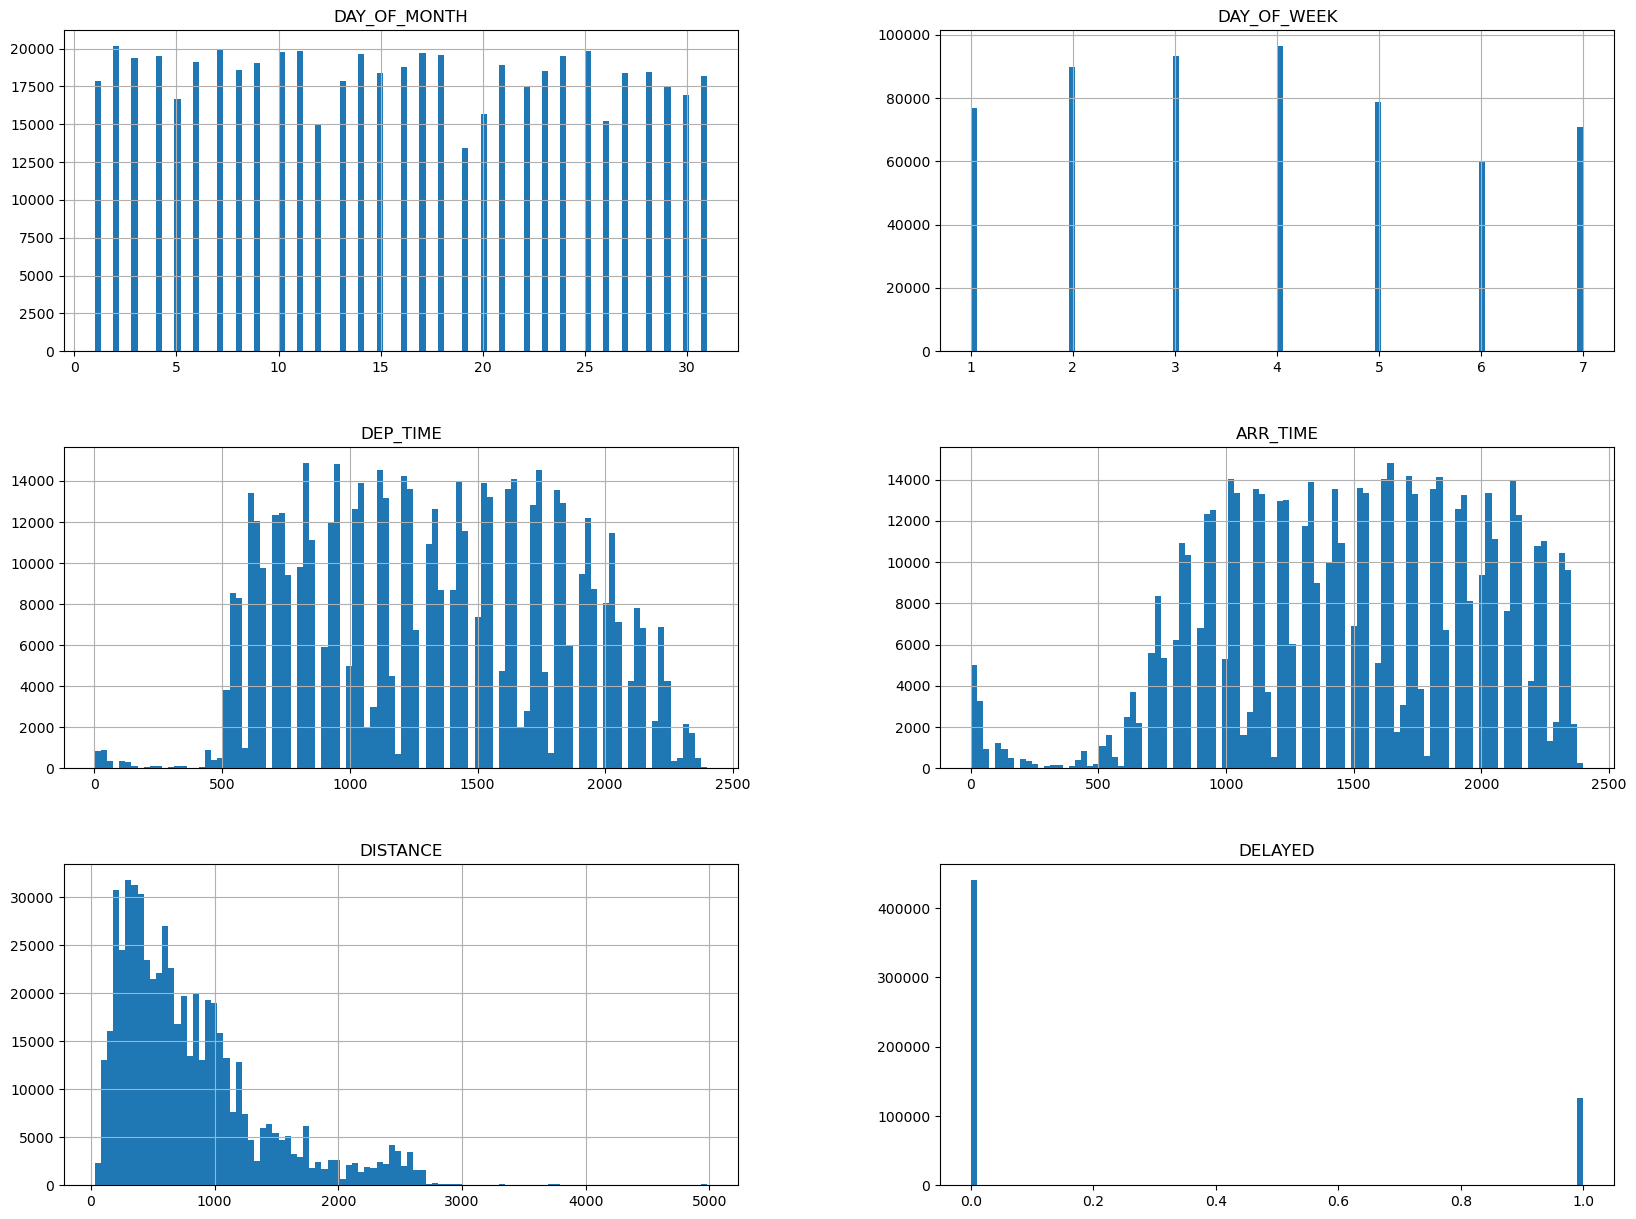

In [18]:
df.hist(bins=100,figsize=(20,15))
plt.grid()
plt.show()

In [27]:
def check_outliers(df):
    for col in num_columns:
        fig,ax = plt.subplots(figsize=(2,3))
        plt.grid()
        sns.boxplot(x=df[col])
        plt.show()

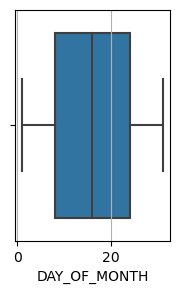

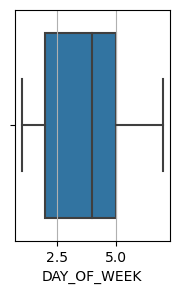

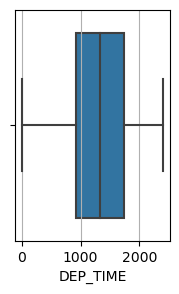

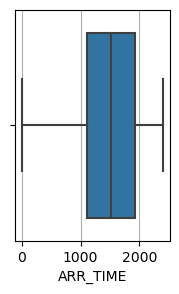

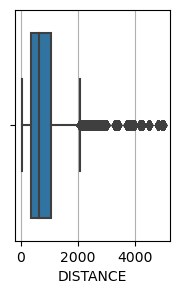

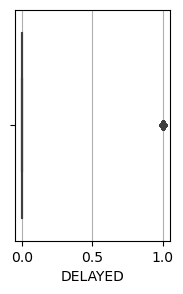

In [28]:
check_outliers(df)

In [33]:
def replace_outliers(df):
    for column in num_columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        up_lim = q3 + 1.5 * iqr
        low_lim = q1 - 1.5 * iqr 
        col_mean = df[column].mean()
        out_up = (df[column] > up_lim)
        out_down = (df[column] < low_lim)
        df[column] = np.where((df[column] > up_lim)| (df[column] > low_lim) , col_mean , df[column] )
    return(df)
replace_outliers(df)

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_TIME_BLK,ARR_TIME,DISTANCE,DELAYED
0,15.783186,3.83823,9E,GNV,ATL,1331.880735,0600-0659,1484.317101,802.817243,0.0
1,15.783186,3.83823,9E,MSP,CVG,1331.880735,1400-1459,1484.317101,802.817243,0.0
2,15.783186,3.83823,9E,DTW,CVG,1331.880735,1200-1259,1484.317101,802.817243,0.0
3,15.783186,3.83823,9E,TLH,ATL,1331.880735,1500-1559,1484.317101,802.817243,0.0
4,15.783186,3.83823,9E,ATL,FSM,1331.880735,1900-1959,1484.317101,802.817243,0.0
...,...,...,...,...,...,...,...,...,...,...
583980,15.783186,3.83823,UA,GUM,HNL,1331.880735,0700-0759,1484.317101,802.817243,0.0
583981,15.783186,3.83823,UA,GUM,SPN,1331.880735,0700-0759,1484.317101,802.817243,0.0
583982,15.783186,3.83823,UA,SPN,GUM,1331.880735,0900-0959,1484.317101,802.817243,0.0
583983,15.783186,3.83823,UA,SPN,GUM,1331.880735,1800-1859,1484.317101,802.817243,0.0


In [44]:
def encode_categories(features):
    lb_make = preprocessing.LabelEncoder()
    for i in range(len(features)):
        df[features[i]] = lb_make.fit_transform(df[features[i]])

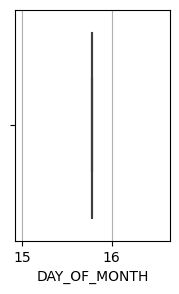

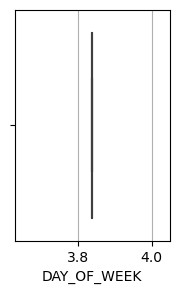

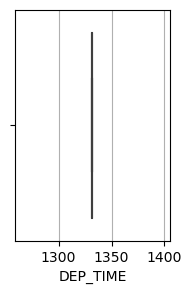

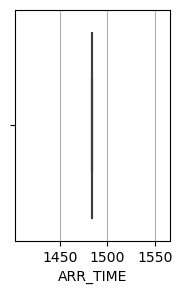

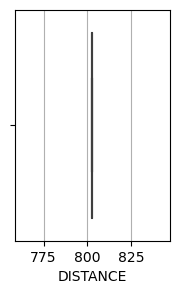

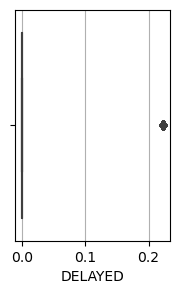

In [36]:
check_outliers(df)

In [45]:
encode_categories(['OP_UNIQUE_CARRIER' , 'ORIGIN' , 'DEST' , 'DEP_TIME_BLK'])

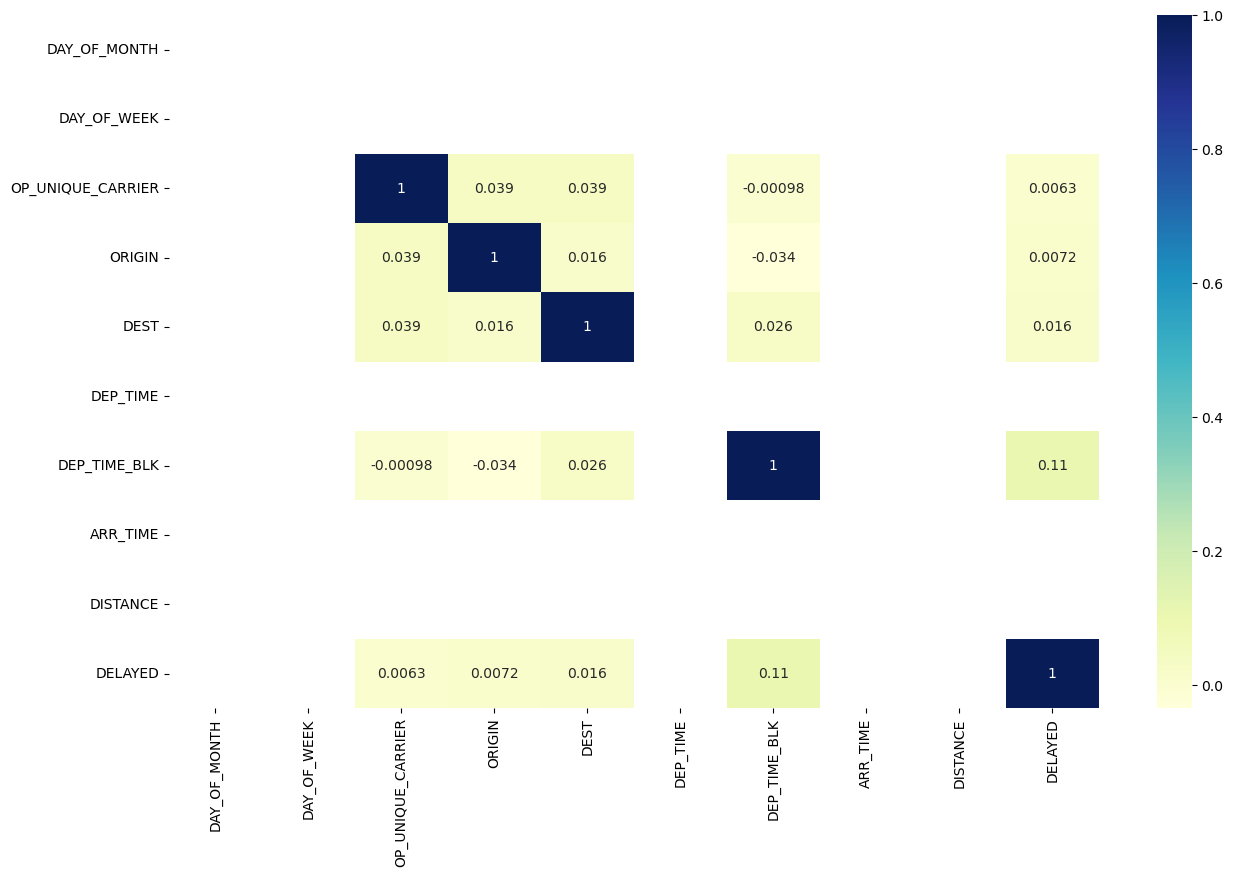

In [46]:
fig,ax = plt.subplots(figsize=(15,9))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [64]:
x = df.drop('DELAYED',axis=1)
y = df['DELAYED']
lb_make = preprocessing.LabelEncoder()
y_trans = lb_make.fit_transform(y)

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y_trans, test_size = 0.3,random_state=42)

In [66]:
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))

In [67]:
for name, model in models:
    
    print(name)

    
    trained_model = model.fit(x_train, y_train)
        
    predictions = trained_model.predict(x_test) 
    
    print(f"train score: {accuracy_score(y_train, trained_model.predict(x_train))}\n")
    
    print(f"test score: {accuracy_score(predictions,y_test)}\n\n")

LogisticRegression
train score: 0.7777198207869047

test score: 0.7766364646601245


RandomForest
train score: 0.7968884655508686

test score: 0.7674876673506705


Decision Tree
train score: 0.7969010648967105

test score: 0.7701100089959254


KNN
train score: 0.7727052811418031

test score: 0.7467441217801348




In [106]:
# old accuracy
lr = LogisticRegression()
lr.fit(x_train,y_train)
trained_model = lr.fit(x_train, y_train)
trained_model.fit(x_train, y_train)  
predictions = trained_model.predict(x_test) 
lr_old_train = accuracy_score(y_train, trained_model.predict(x_train))
pred = lr.predict(x_test)
lr_old_accur = accuracy_score(y_test, pred)

# new accuracy
lr = LogisticRegression(C = 10)
lr.fit(x_train,y_train)
trained_model = lr.fit(x_train, y_train)
trained_model.fit(x_train, y_train)  
predictions = trained_model.predict(x_test) 
lr_new_train = accuracy_score(y_train, trained_model.predict(x_train))
pred = lr.predict(x_test)
lr_new_accur = accuracy_score(y_test, pred)

print("The Training Accuracy of LogisticRegression Model before tuning: " + str(rf1_old_train))
print("The Testing Accuracy of LogisticRegression Model before tuning: " + str(rf1_old_accur))
print()
print("The Training Accuracy of LogisticRegressiont Model after tuning: " + str(rf1_new_train))
print("The Testing Accuracy of LogisticRegression Model after tuning: " + str(rf1_new_accur))
print()

The Training Accuracy of LogisticRegression Model before tuning: 0.7777198207869047
The Testing Accuracy of LogisticRegression Model before tuning: 0.7766364646601245

The Training Accuracy of LogisticRegressiont Model after tuning: 0.7777198207869047
The Testing Accuracy of LogisticRegression Model after tuning: 0.7766364646601245

